In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from google.colab import files

# Data Understanding

## About Dataset

Columns description:
* id: unique id for each entry.
* c_date: Date of spending of the marketing budget.
* campaign_name: Name of the campaign.
* category: Category of the campaign (e.g., social, search, influencer, media).
* campaign_id: Unique identifier id for each campaign.
* impressions: Number of impressions generated by the campaign.
* mark_spend: Amount spent on the campaign.
* clicks: Number of clicks received.
* leads: Number of leads generated.
* orders: Number of orders made.
* revenue: Revenue generated from the campaign.


## Load Dataset

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9Mvr-ay0dd9CtBvpzn2U8oPIrBdKRQMPrBaOq-WDaviGSqEQXoQwK2lQcNNt8PRWD9BNalvBiTxEU/pub?output=csv')

In [4]:
df

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0
304,305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0
305,306,2021-02-28,facebook_lal,social,544756,25840,6844.80,248,5,1,1491
306,307,2021-02-28,instagram_blogger,influencer,374754,94058,4845.65,594,12,1,5008


## Data Information

In [5]:
df.shape

(308, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 26.6+ KB


# Data Preprocessing

In [7]:
# Check unique value
unique_values = {column: df[column].unique() for column in df.columns}

In [8]:
unique_values

{'id': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 17

In [9]:
# Check missing value
df.isnull().sum()

id               0
c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

In [10]:
# Check duplicate
df.duplicated().sum()

0

In [11]:
# Data Cleaning
# Rename Column Name
new_column_names = {
    'id': 'ID',
    'c_date': 'Date',
    'campaign_name': 'Campaign Name',
    'category': 'Category',
    'campaign_id': 'Campaign ID',
    'impressions': 'Impressions',
    'mark_spent': 'Marketing Spent',
    'clicks': 'Clicks',
    'leads': 'Leads',
    'orders': 'Orders',
    'revenue': 'Revenue'
}

df.rename(columns=new_column_names, inplace=True)

In [12]:
df

,ID,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,instagram_tier2,social,983498,775780,760.75,1024,4,0,0
304,305,2021-02-28,facebook_retargeting,social,4387490,1933,224.81,58,0,0,0
305,306,2021-02-28,facebook_lal,social,544756,25840,6844.80,248,5,1,1491
306,307,2021-02-28,instagram_blogger,influencer,374754,94058,4845.65,594,12,1,5008


In [13]:
# Rename Campaign Name Value
mapping_campaign_names = {
    'facebook_tier1': 'Facebook Tier 1',
    'facebOOK_tier2': 'Facebook Tier 2',
    'google_hot': 'Google Hot',
    'google_wide': 'Google Wide',
    'youtube_blogger': 'Youtube Blogger',
    'instagram_tier1': 'Instagram Tier 1',
    'instagram_tier2': 'Instagram Tier 2',
    'facebook_retargeting': 'Facebook Retargeting',
    'facebook_lal': 'Facebook Lal',
    'instagram_blogger': 'Instagram Blogger',
    'banner_partner': 'Banner Partner'
}

df['Campaign Name'] = df['Campaign Name'].replace(mapping_campaign_names)

In [14]:
df

,ID,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue
0,1,2021-02-01,Facebook Tier 1,social,349043,148263,7307.37,1210,13,1,4981
1,2,2021-02-01,Facebook Tier 2,social,348934,220688,16300.20,1640,48,3,14962
2,3,2021-02-01,Google Hot,search,89459845,22850,5221.60,457,9,1,7981
3,4,2021-02-01,Google Wide,search,127823,147038,6037.00,1196,24,1,2114
4,5,2021-02-01,Youtube Blogger,influencer,10934,225800,29962.20,2258,49,10,84490
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,Instagram Tier 2,social,983498,775780,760.75,1024,4,0,0
304,305,2021-02-28,Facebook Retargeting,social,4387490,1933,224.81,58,0,0,0
305,306,2021-02-28,Facebook Lal,social,544756,25840,6844.80,248,5,1,1491
306,307,2021-02-28,Instagram Blogger,influencer,374754,94058,4845.65,594,12,1,5008


In [15]:
# Rename category
mapping_category = {
    'social': 'Social',
    'search': 'Search',
    'influencer': 'Influencer',
    'media': 'Media',
}

df['Category'] = df['Category'].replace(mapping_category )

In [16]:
df

,ID,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue
0,1,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981
1,2,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962
2,3,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981
3,4,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114
4,5,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490
...,...,...,...,...,...,...,...,...,...,...,...
303,304,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0
304,305,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0
305,306,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491
306,307,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008


In [17]:
# Data Reduction
# delete column ID
df.drop(columns=['ID'], inplace=True)

# Data Exploration

In [18]:
df.describe()

,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue
count,3.080000e+02,3.080000e+02,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,9.605628e+06,5.122475e+06,99321.038377,9739.996753,212.918831,26.113636,1.392512e+05
std,2.543040e+07,2.631134e+07,144008.011181,12157.476244,300.459978,42.741288,2.763031e+05
min,1.093400e+04,6.670000e+02,169.750000,20.000000,0.000000,0.000000,0.000000e+00
25%,1.278230e+05,1.479568e+05,9465.195000,1347.250000,20.750000,3.000000,8.580000e+03
50%,3.747540e+05,6.028100e+05,36765.150000,4349.500000,84.000000,9.000000,3.891700e+04
75%,4.387490e+06,3.254450e+06,129372.250000,13499.250000,270.500000,29.250000,1.370492e+05
max,8.945984e+07,4.199700e+08,880357.000000,61195.000000,1678.000000,369.000000,2.812520e+06


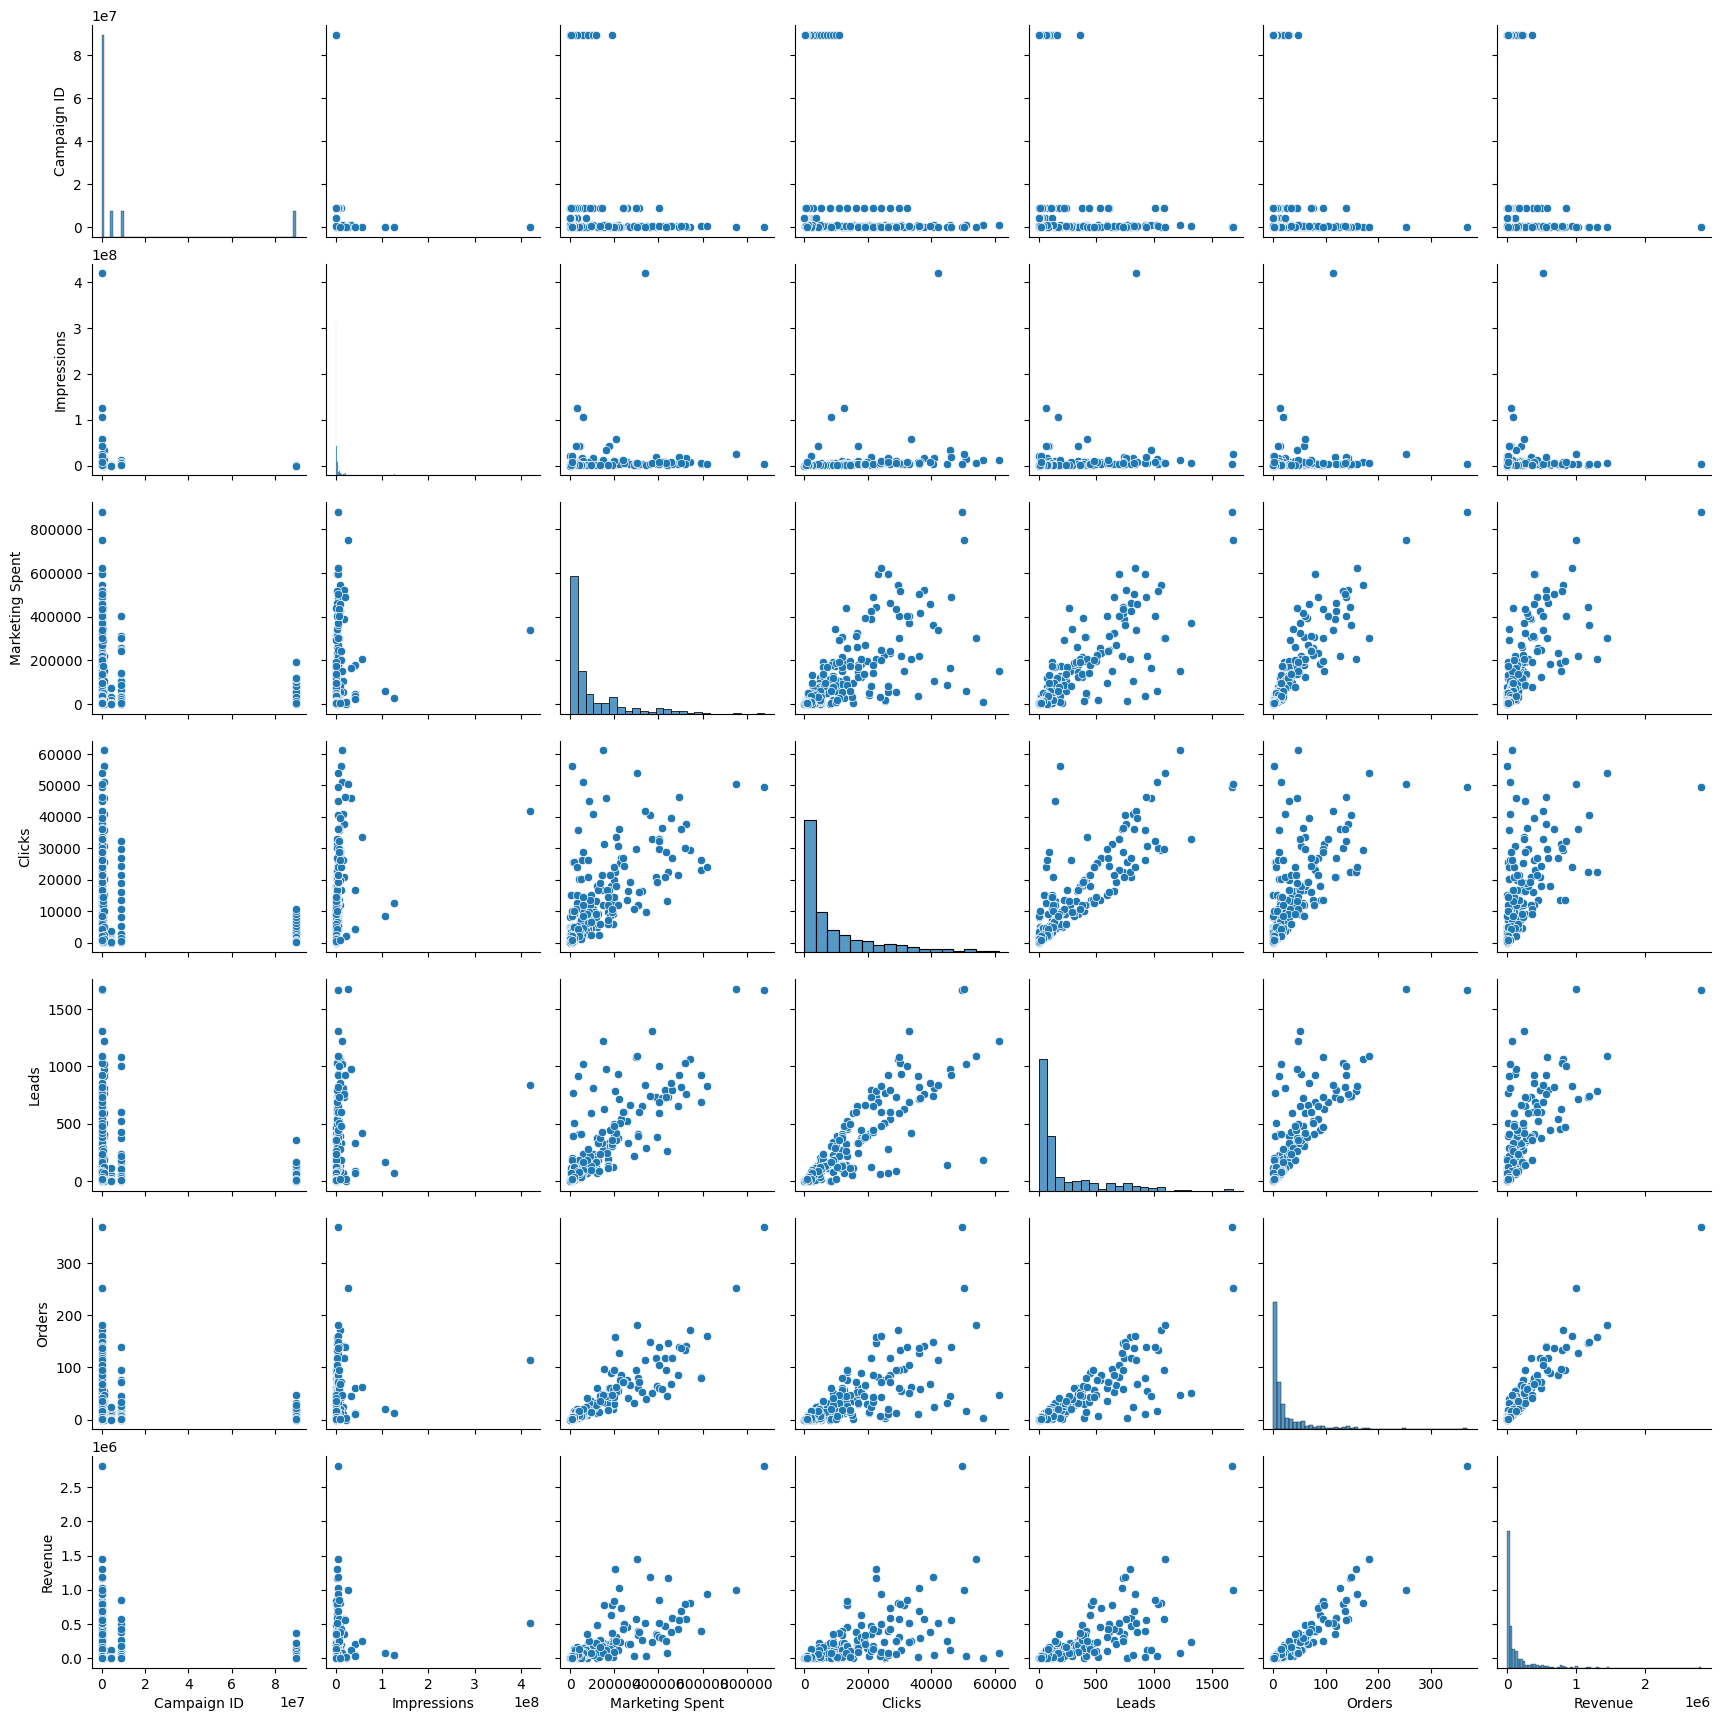

In [19]:
sns.pairplot(df)

In [20]:
df_numeric = df.drop(columns=['Campaign Name', 'Category', 'Date'])
df_numeric.corr()

,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue
Campaign ID,1.000000,-0.067203,-0.137865,-0.181839,-0.163947,-0.129938,-0.076765
Impressions,-0.067203,1.000000,0.145701,0.254093,0.192098,0.171560,0.104213
Marketing Spent,-0.137865,0.145701,1.000000,0.698368,0.840909,0.894334,0.759587
Clicks,-0.181839,0.254093,0.698368,1.000000,0.871051,0.714570,0.617992
Leads,-0.163947,0.192098,0.840909,0.871051,1.000000,0.853192,0.740299
Orders,-0.129938,0.171560,0.894334,0.714570,0.853192,1.000000,0.942876
Revenue,-0.076765,0.104213,0.759587,0.617992,0.740299,0.942876,1.000000


<Axes: >

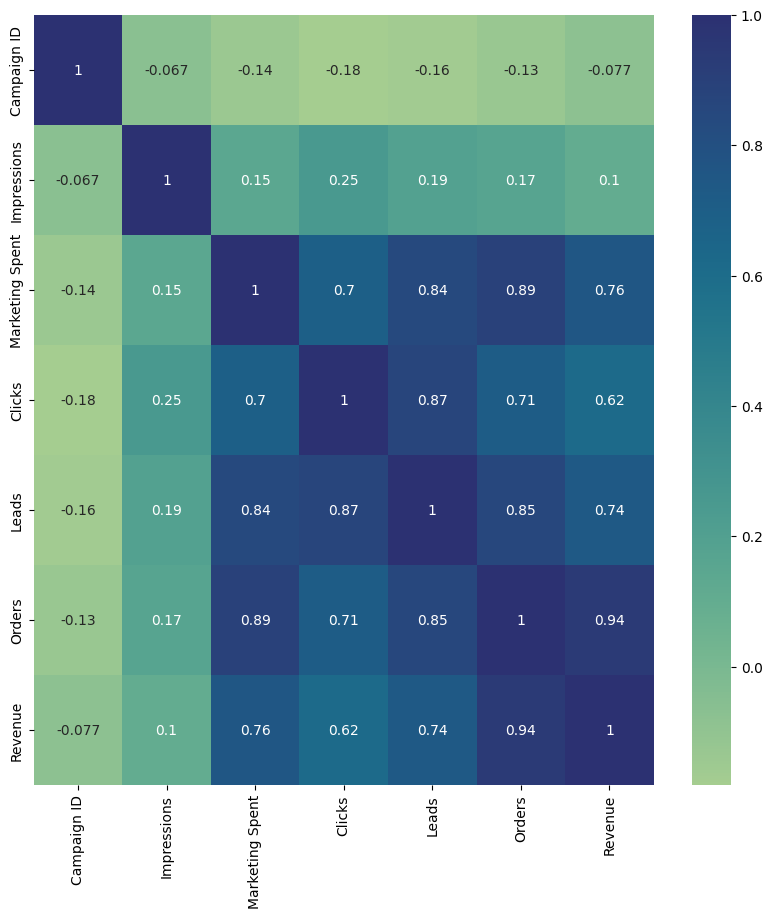

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='crest')

Marketing Spent, Clicks, Leads, Orders, and Revenue variables are variables that have a strong positive correlation between these variables. This shows the relationship that occurs between these variables.

# Campaign Performance Metrics Analysis
references: https://www.owox.com/blog/articles/digital-marketing-metrics-and-kpis/

In [22]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490
...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008


## Return on Marketing Investment (ROMI) / ROI in Marketing

Return on investment (ROI) is a very important metric that measures the efficiency of various investments. It is a measure that contrasts the gains or losses from an investment against its original cost.

In marketing, this ratio is pivotal for measuring the success of efforts and investments, be it in evaluating the impact of a marketing campaign, determining the return on a product launch, or analyzing the profitability of a new promotional strategy. It helps in making informed decisions about where and how to allocate marketing resources for maximum effectiveness.

The definition of ROI is a ratio of income from an investment to the expenses to finance that investment. The higher the ratio is, the more benefit you earn. It is a measure that contrasts the gains or losses from an investment against its original cost.

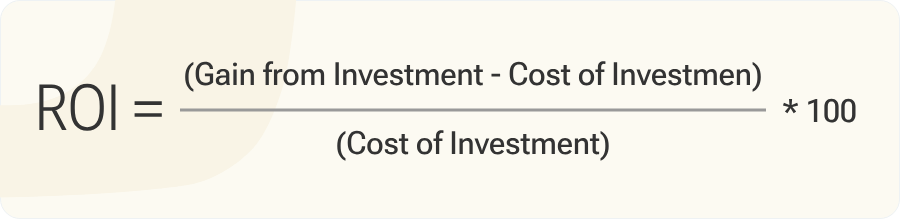

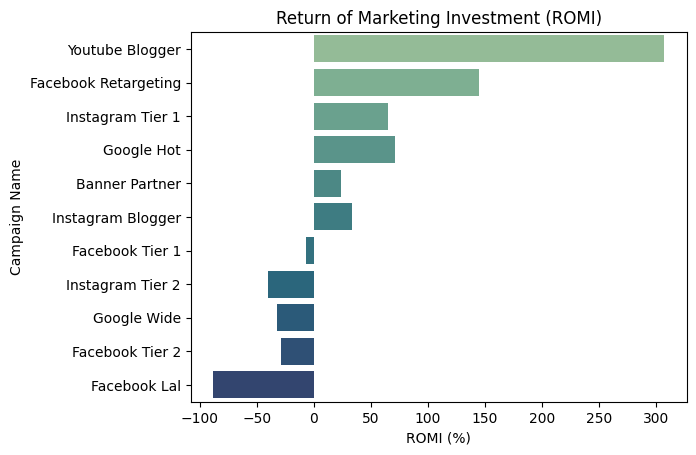

In [23]:
df['ROMI'] = (((df['Revenue'] - df['Marketing Spent']) / df['Marketing Spent']) * 100).round(2)

sns.barplot(x='ROMI', y='Campaign Name', data=df.sort_values('ROMI', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Return of Marketing Investment (ROMI)')
plt.xlabel('ROMI (%)')
plt.ylabel('Campaign Name')
plt.show()

In [24]:
ROMI = df.groupby('Campaign Name')['ROMI'].mean().round(2).sort_values(ascending=False)
print(ROMI)
total_romi = ROMI.mean().round(2)
print("Total ROMI:", total_romi, "%")

Campaign Name
Youtube Blogger         306.87
Facebook Retargeting    145.03
Google Hot               70.86
Instagram Tier 1         64.59
Instagram Blogger        33.14
Banner Partner           24.23
Facebook Tier 1          -6.64
Facebook Tier 2         -29.08
Google Wide             -32.58
Instagram Tier 2        -39.95
Facebook Lal            -88.09
Name: ROMI, dtype: float64
Total ROMI: 40.76 %


## Click-Through Rate (CTR) - Impressions to Clicks

Clicks mean purchases to a certain degree. The click-through rate is the ratio of users who click a link to the total number of users who view it.

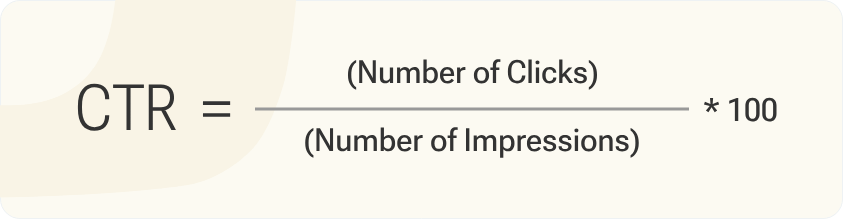

In [25]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99
...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35


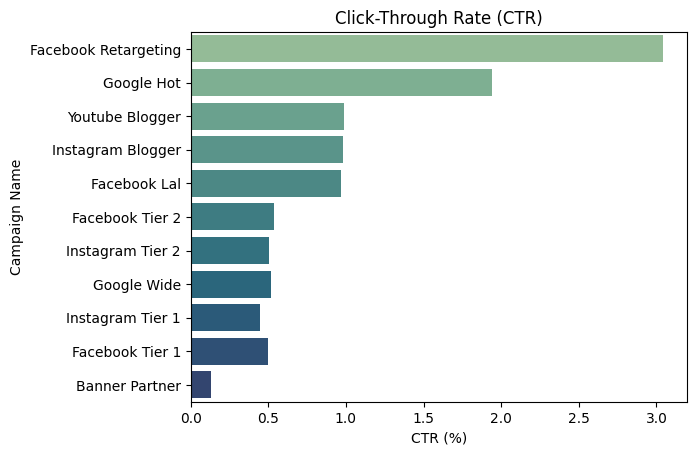

In [26]:
df['CTR'] = ((df['Clicks'] / df['Impressions']) * 100).round(2)

sns.barplot(x='CTR', y='Campaign Name', data=df.sort_values('CTR', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Click-Through Rate (CTR)')
plt.xlabel('CTR (%)')
plt.ylabel('Campaign Name')
plt.show()

In [27]:
CTR = df.groupby('Campaign Name')['CTR'].mean().round(2).sort_values(ascending=False)
print(CTR)
total_ctr = CTR.mean().round(2)
print("Total CTR:", total_ctr, "%")

Campaign Name
Facebook Retargeting    3.04
Google Hot              1.94
Youtube Blogger         0.99
Instagram Blogger       0.98
Facebook Lal            0.97
Facebook Tier 2         0.54
Google Wide             0.52
Instagram Tier 2        0.51
Facebook Tier 1         0.50
Instagram Tier 1        0.44
Banner Partner          0.13
Name: CTR, dtype: float64
Total CTR: 0.96 %


## Conversion Rate (CR) 1 - Clicks to Leads

Conversion rate is the simplest but not unimportant digital marketing performance metric. Conversion rate is the percentage of users who complete the desired action for example for this case is users who make clicks, leads and orders.

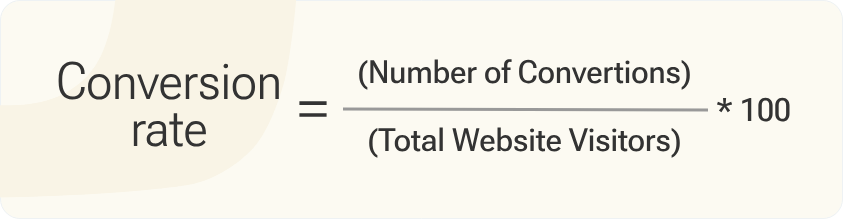

In [28]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63


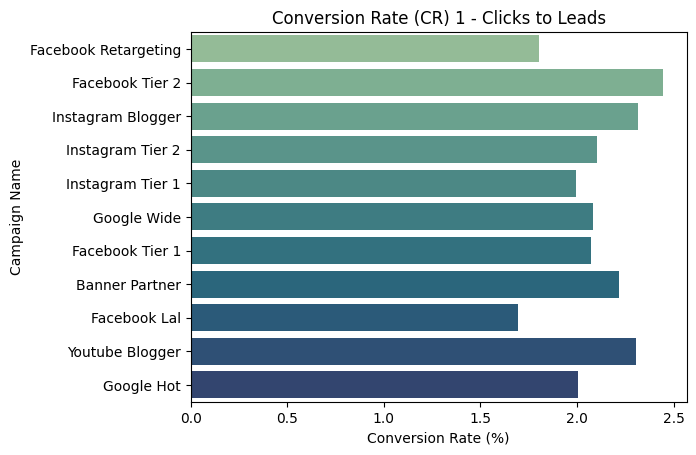

In [29]:
df['CR 1'] = ((df['Leads'] / df['Clicks']) * 100).round(2)

sns.barplot(x='CR 1', y='Campaign Name', data=df.sort_values('CR 1', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Conversion Rate (CR) 1 - Clicks to Leads')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Campaign Name')
plt.show()

In [30]:
CR1 = df.groupby('Campaign Name')['CR 1'].mean().round(2).sort_values(ascending=False)
print(CR1)
total_cr1 = CR1.mean().round(2)
print("Total CR 1:", total_cr1, "%")

Campaign Name
Facebook Tier 2         2.44
Instagram Blogger       2.32
Youtube Blogger         2.30
Banner Partner          2.21
Instagram Tier 2        2.10
Google Wide             2.08
Facebook Tier 1         2.07
Google Hot              2.01
Instagram Tier 1        1.99
Facebook Retargeting    1.80
Facebook Lal            1.69
Name: CR 1, dtype: float64
Total CR 1: 2.09 %


## Conversion Rate (CR) 2 - Leads to Orders

Conversion rate is the simplest but not unimportant digital marketing performance metric. Conversion rate is the percentage of users who complete the desired action for example for this case is users who make clicks, leads and orders.

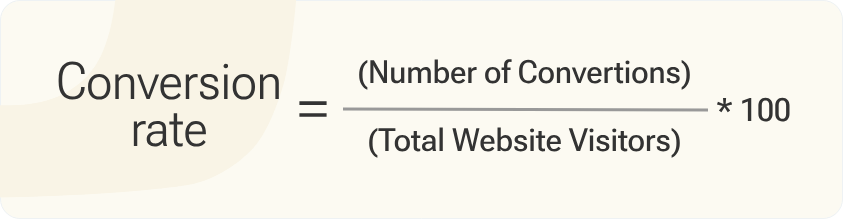

In [31]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02


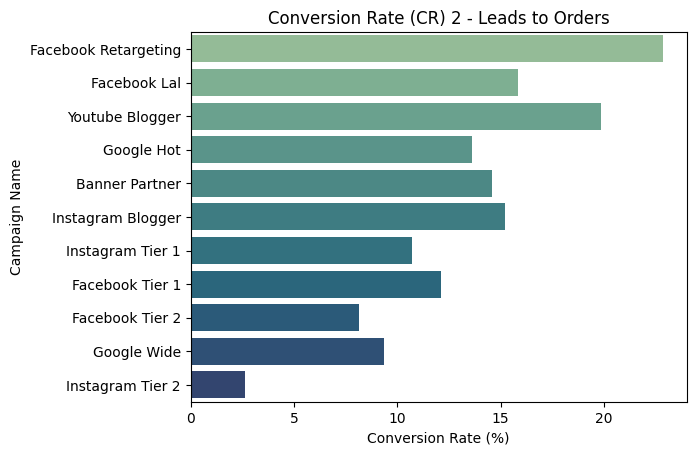

In [32]:
df['CR 2'] = ((df['Orders'] / df['Leads']) * 100).round(2)

sns.barplot(x='CR 2', y='Campaign Name', data=df.sort_values('CR 2', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Conversion Rate (CR) 2 - Leads to Orders')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Campaign Name')
plt.show()

In [33]:
CR2 = df.groupby('Campaign Name')['CR 2'].mean().round(2).sort_values(ascending=False)
print(CR2)
total_cr2 = CR2.mean().round(2)
print("Total CR 2:", total_cr2, "%")

Campaign Name
Facebook Retargeting    22.86
Youtube Blogger         19.85
Facebook Lal            15.85
Instagram Blogger       15.21
Banner Partner          14.60
Google Hot              13.62
Facebook Tier 1         12.12
Instagram Tier 1        10.73
Google Wide              9.35
Facebook Tier 2          8.15
Instagram Tier 2         2.63
Name: CR 2, dtype: float64
Total CR 2: 13.18 %


## Cost per Click (CPC)

Cost per click or CPC KPI is a performance marketing metric that shows if you can save some money on paid ads. This metric shows how much you pay when your ad is clicked. CPC is used to assess the cost-effectiveness of an ad campaign.

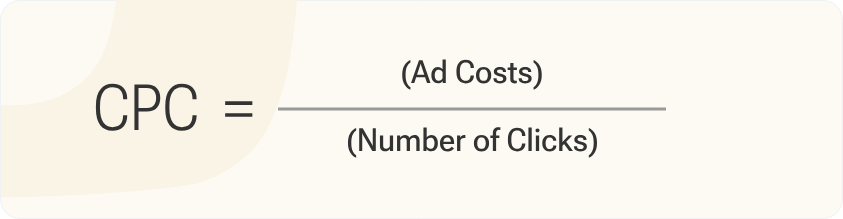

In [34]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,NaN
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33


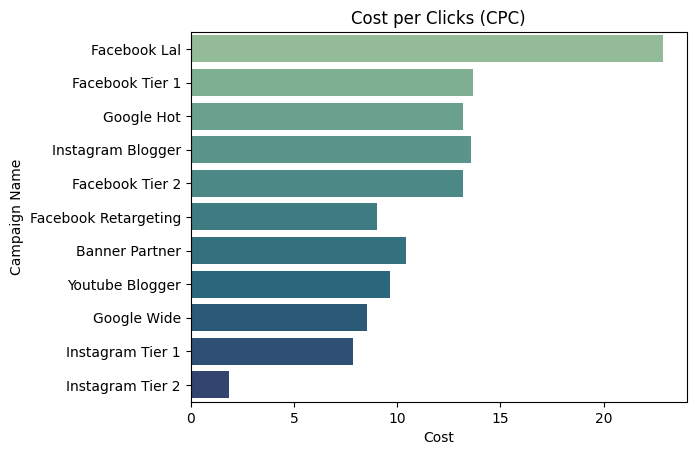

In [35]:
df['CPC'] = (df['Marketing Spent'] / df['Clicks']).round(2)

sns.barplot(x='CPC', y='Campaign Name', data=df.sort_values('CPC', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Cost per Clicks (CPC)')
plt.xlabel('Cost')
plt.ylabel('Campaign Name')
plt.show()

In [36]:
CPC = df.groupby('Campaign Name')['CPC'].mean().round(2).sort_values(ascending=False)
print(CPC)
total_cpc = CPC.mean().round(2)
print("Total CPC:", total_cpc)

Campaign Name
Facebook Lal            22.88
Facebook Tier 1         13.66
Instagram Blogger       13.56
Facebook Tier 2         13.21
Google Hot              13.19
Banner Partner          10.45
Youtube Blogger          9.68
Facebook Retargeting     9.01
Google Wide              8.56
Instagram Tier 1         7.88
Instagram Tier 2         1.88
Name: CPC, dtype: float64
Total CPC: 11.27


## Cost per Lead (CPL)

This is an even hotter KPI than the previous one! Cost per lead is similar to cost per action, except that you pay for the contact information of a person potentially interested in your offer.
To calculate this metric, add all your ad expenditures on the way to registration for gated content, for instance, and divide the total expenditures by the number of acquired leads. This metric will show you if your lead acquisition efforts fall within your budget or if you’re spending too much. Keep in mind that a lead is only halfway to being a client and isn’t even a loyal follower.

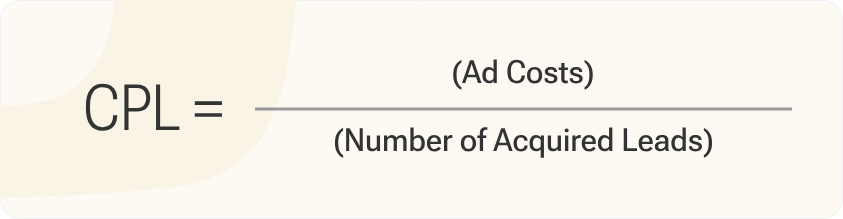

In [37]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2,CPC
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69,6.04
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25,9.94
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11,11.43
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17,5.05
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41,13.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00,0.74
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,NaN,3.88
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00,27.60
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33,8.16


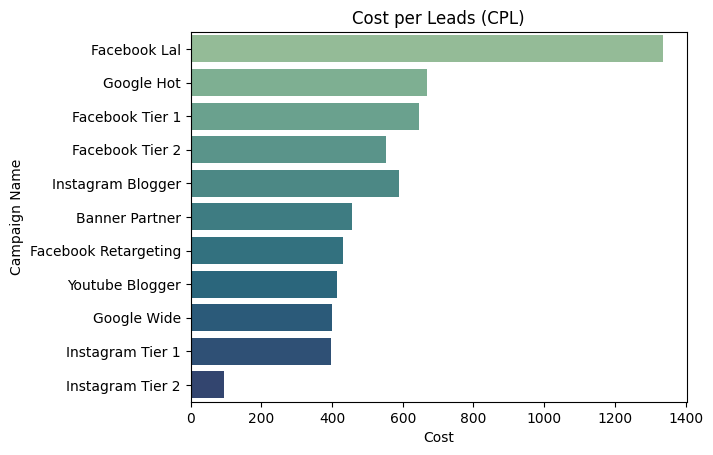

In [38]:
df['CPL'] = (df['Marketing Spent'] / df['Leads']).round(2)
df['CPL'] = np.where(np.isinf(df['CPL']), df['Marketing Spent'], df['CPL'])
sns.barplot(x='CPL', y='Campaign Name', data=df.sort_values('CPL', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Cost per Leads (CPL)')
plt.xlabel('Cost')
plt.ylabel('Campaign Name')
plt.show()

In [39]:
CPL = df.groupby('Campaign Name')['CPL'].mean().round(2).sort_values(ascending=False)
print(CPL)
total_cpl = CPL.mean().round(2)
print("Total CPL:", total_cpl)

Campaign Name
Facebook Lal            1336.40
Google Hot               668.50
Facebook Tier 1          645.94
Instagram Blogger        588.80
Facebook Tier 2          552.08
Banner Partner           456.06
Facebook Retargeting     430.23
Youtube Blogger          415.16
Google Wide              399.76
Instagram Tier 1         396.59
Instagram Tier 2          93.36
Name: CPL, dtype: float64
Total CPL: 543.9


## Customer Acquisition Cost (CAC)

Customer Acquisition Cost (CAC) is a vital digital advertising performance metric that calculates the average cost a business incurs to acquire a new customer. It provides insights into the efficiency and sustainability of marketing and sales strategies.

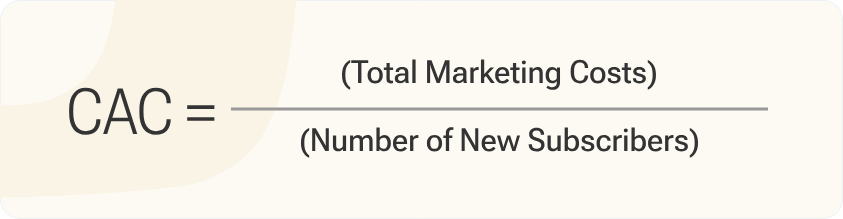

In [40]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2,CPC,CPL
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69,6.04,562.11
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25,9.94,339.59
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11,11.43,580.18
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17,5.05,251.54
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41,13.27,611.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00,0.74,190.19
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,NaN,3.88,224.81
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00,27.60,1368.96
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33,8.16,403.80


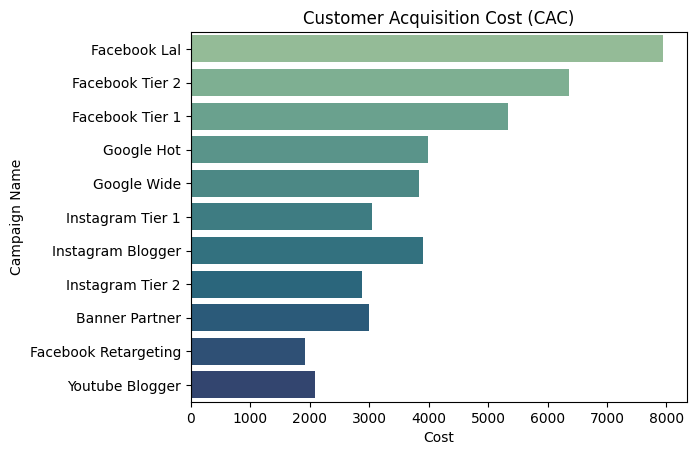

In [41]:
df['CAC'] = (df['Marketing Spent'] / df['Orders']).round(2)
df['CAC'] = np.where(np.isinf(df['CAC']), df['Marketing Spent'], df['CAC'])
sns.barplot(x='CAC', y='Campaign Name', data=df.sort_values('CAC', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Customer Acquisition Cost (CAC)')
plt.xlabel('Cost')
plt.ylabel('Campaign Name')
plt.show()

In [42]:
CAC = df.groupby('Campaign Name')['CAC'].mean().round(2).sort_values(ascending=False)
print(CAC)
total_cac = CAC.mean().round(2)
print("Total CAC:", total_cac)

Campaign Name
Facebook Lal            7942.30
Facebook Tier 2         6353.35
Facebook Tier 1         5334.61
Google Hot              3991.44
Instagram Blogger       3900.53
Google Wide             3840.48
Instagram Tier 1        3052.10
Banner Partner          2995.18
Instagram Tier 2        2873.48
Youtube Blogger         2090.79
Facebook Retargeting    1914.66
Name: CAC, dtype: float64
Total CAC: 4026.27


## Average Order Value (AOV)

AOV (average order value) is a business metric measuring the average amount of an ecommerce purchase on an ecommerce website or app. AOV gives retail and ecommerce stores an idea of the total amount of money customers spend on the average order. Businesses can use the metric to draw general conclusions about larger customer purchasing patterns and behaviors.

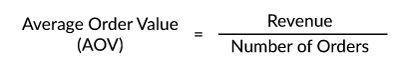

In [43]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2,CPC,CPL,CAC
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69,6.04,562.11,7307.37
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25,9.94,339.59,5433.40
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11,11.43,580.18,5221.60
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17,5.05,251.54,6037.00
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41,13.27,611.47,2996.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00,0.74,190.19,760.75
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,NaN,3.88,224.81,224.81
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00,27.60,1368.96,6844.80
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33,8.16,403.80,4845.65


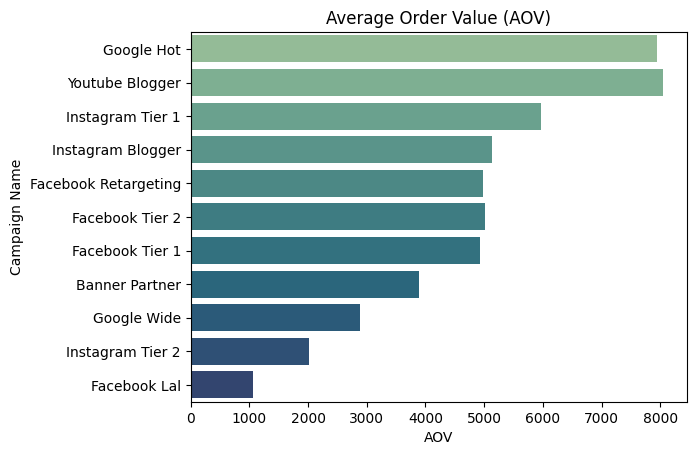

In [44]:
df['AOV'] = (df['Revenue'] / df['Orders']).round(2)

sns.barplot(x='AOV', y='Campaign Name', data=df.sort_values('AOV', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Average Order Value (AOV)')
plt.xlabel('AOV')
plt.ylabel('Campaign Name')
plt.show()

In [45]:
AOV = df.groupby('Campaign Name')['AOV'].mean().round(2).sort_values(ascending=False)
print(AOV)
total_aov = AOV.mean().round(2)
print("Total AOV:", total_aov)

Campaign Name
Youtube Blogger         8046.61
Google Hot              7937.04
Instagram Tier 1        5960.48
Instagram Blogger       5138.96
Facebook Tier 2         5009.01
Facebook Retargeting    4984.48
Facebook Tier 1         4926.14
Banner Partner          3888.78
Google Wide             2881.38
Instagram Tier 2        2019.32
Facebook Lal            1061.77
Name: AOV, dtype: float64
Total AOV: 4714.0


## Return on Ad Spend (ROAS)

Simple and understandable, this is one of the most important key metrics for digital marketing to measure ad performance. Return on ad spend is the amount of revenue your business gets for every money spent on ads. Use it as the main metric for each digital marketing campaign and you’ll feel the difference between effective and ineffective campaigns.

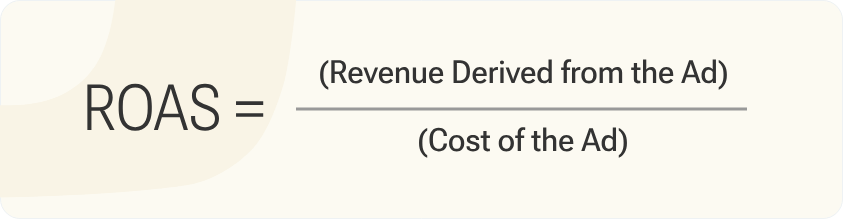

In [46]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2,CPC,CPL,CAC,AOV
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69,6.04,562.11,7307.37,4981.00
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25,9.94,339.59,5433.40,4987.33
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11,11.43,580.18,5221.60,7981.00
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17,5.05,251.54,6037.00,2114.00
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41,13.27,611.47,2996.22,8449.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00,0.74,190.19,760.75,NaN
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,NaN,3.88,224.81,224.81,NaN
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00,27.60,1368.96,6844.80,1491.00
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33,8.16,403.80,4845.65,5008.00


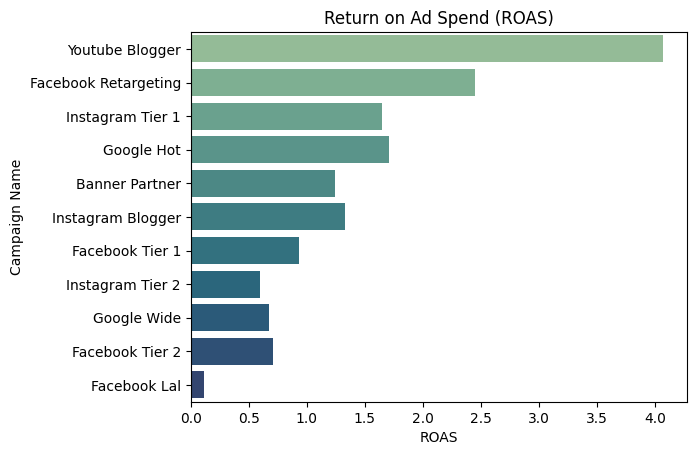

In [47]:
df['ROAS'] = (df['Revenue'] / df['Marketing Spent']).round(2)

sns.barplot(x='ROAS', y='Campaign Name', data=df.sort_values('ROAS', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Return on Ad Spend (ROAS)')
plt.xlabel('ROAS')
plt.ylabel('Campaign Name')
plt.show()

In [48]:
ROAS = df.groupby('Campaign Name')['ROAS'].mean().round(2).sort_values(ascending=False)
print(ROAS)
total_roas = ROAS.mean().round(2)
print("Total ROAS:", total_roas)

Campaign Name
Youtube Blogger         4.07
Facebook Retargeting    2.45
Google Hot              1.71
Instagram Tier 1        1.65
Instagram Blogger       1.33
Banner Partner          1.24
Facebook Tier 1         0.93
Facebook Tier 2         0.71
Google Wide             0.67
Instagram Tier 2        0.60
Facebook Lal            0.12
Name: ROAS, dtype: float64
Total ROAS: 1.41


## Gross Profit

Gross Profit is an important metric used to evaluate the efficiency and effectiveness of marketing efforts in generating net profits for the company. By measuring the difference between gross revenue from the sale of a product or service and its associated direct costs, Gross Profit provides a direct view of marketing performance in generating sufficient profit to cover the costs of producing or providing a product or service. As a KPI, Gross Profit assists companies in directing marketing strategies, assessing marketing campaign performance, and driving business growth with a focus on achieving optimal profits.

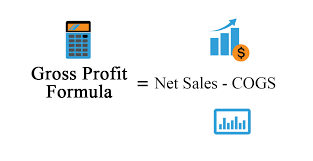

In [49]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2,CPC,CPL,CAC,AOV,ROAS
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69,6.04,562.11,7307.37,4981.00,0.68
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25,9.94,339.59,5433.40,4987.33,0.92
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11,11.43,580.18,5221.60,7981.00,1.53
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17,5.05,251.54,6037.00,2114.00,0.35
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41,13.27,611.47,2996.22,8449.00,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00,0.74,190.19,760.75,NaN,0.00
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,NaN,3.88,224.81,224.81,NaN,0.00
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00,27.60,1368.96,6844.80,1491.00,0.22
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33,8.16,403.80,4845.65,5008.00,1.03


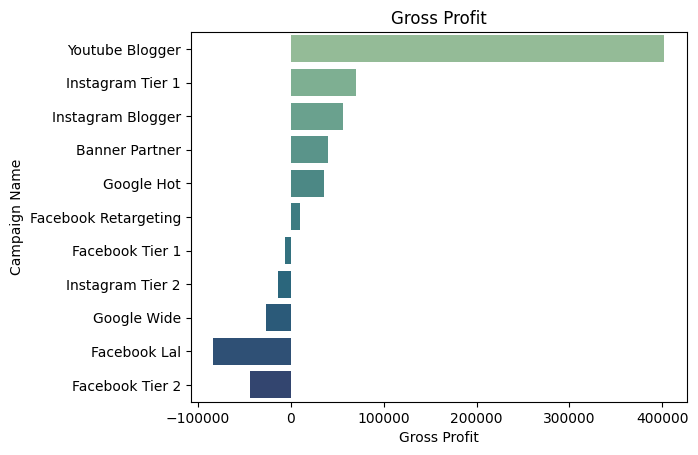

In [50]:
df['GP'] = (df['Revenue'] - df['Marketing Spent']).round(2)

sns.barplot(x='GP', y='Campaign Name', data=df.sort_values('GP', ascending=False), palette='crest', errorbar=None, hue='Campaign Name', dodge=False)
plt.title('Gross Profit')
plt.xlabel('Gross Profit')
plt.ylabel('Campaign Name')
plt.show()

In [51]:
GP = df.groupby('Campaign Name')['GP'].mean().round(2).sort_values(ascending=False)
print(GP)
total_gp = GP.mean().round(2)
print("Total GP:", total_gp)

Campaign Name
Youtube Blogger         401910.59
Instagram Tier 1         70673.10
Instagram Blogger        55753.09
Banner Partner           40224.47
Google Hot               35919.58
Facebook Retargeting      9659.03
Facebook Tier 1          -6013.62
Instagram Tier 2        -14131.92
Google Wide             -27181.55
Facebook Tier 2         -43948.75
Facebook Lal            -83632.37
Name: GP, dtype: float64
Total GP: 39930.15


# Data Preprocessing after EDA

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             308 non-null    object 
 1   Campaign Name    308 non-null    object 
 2   Category         308 non-null    object 
 3   Campaign ID      308 non-null    int64  
 4   Impressions      308 non-null    int64  
 5   Marketing Spent  308 non-null    float64
 6   Clicks           308 non-null    int64  
 7   Leads            308 non-null    int64  
 8   Orders           308 non-null    int64  
 9   Revenue          308 non-null    int64  
 10  ROMI             308 non-null    float64
 11  CTR              308 non-null    float64
 12  CR 1             308 non-null    float64
 13  CR 2             304 non-null    float64
 14  CPC              308 non-null    float64
 15  CPL              308 non-null    float64
 16  CAC              308 non-null    float64
 17  AOV             

In [53]:
# check missing value
df.isnull().sum()

Date                0
Campaign Name       0
Category            0
Campaign ID         0
Impressions         0
Marketing Spent     0
Clicks              0
Leads               0
Orders              0
Revenue             0
ROMI                0
CTR                 0
CR 1                0
CR 2                4
CPC                 0
CPL                 0
CAC                 0
AOV                19
ROAS                0
GP                  0
dtype: int64

In [54]:
# handling missing value
df = df.fillna(0)

In [55]:
df.isnull().sum()

Date               0
Campaign Name      0
Category           0
Campaign ID        0
Impressions        0
Marketing Spent    0
Clicks             0
Leads              0
Orders             0
Revenue            0
ROMI               0
CTR                0
CR 1               0
CR 2               0
CPC                0
CPL                0
CAC                0
AOV                0
ROAS               0
GP                 0
dtype: int64

In [56]:
df

,Date,Campaign Name,Category,Campaign ID,Impressions,Marketing Spent,Clicks,Leads,Orders,Revenue,ROMI,CTR,CR 1,CR 2,CPC,CPL,CAC,AOV,ROAS,GP
0,2021-02-01,Facebook Tier 1,Social,349043,148263,7307.37,1210,13,1,4981,-31.84,0.82,1.07,7.69,6.04,562.11,7307.37,4981.00,0.68,-2326.37
1,2021-02-01,Facebook Tier 2,Social,348934,220688,16300.20,1640,48,3,14962,-8.21,0.74,2.93,6.25,9.94,339.59,5433.40,4987.33,0.92,-1338.20
2,2021-02-01,Google Hot,Search,89459845,22850,5221.60,457,9,1,7981,52.85,2.00,1.97,11.11,11.43,580.18,5221.60,7981.00,1.53,2759.40
3,2021-02-01,Google Wide,Search,127823,147038,6037.00,1196,24,1,2114,-64.98,0.81,2.01,4.17,5.05,251.54,6037.00,2114.00,0.35,-3923.00
4,2021-02-01,Youtube Blogger,Influencer,10934,225800,29962.20,2258,49,10,84490,181.99,1.00,2.17,20.41,13.27,611.47,2996.22,8449.00,2.82,54527.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2021-02-28,Instagram Tier 2,Social,983498,775780,760.75,1024,4,0,0,-100.00,0.13,0.39,0.00,0.74,190.19,760.75,0.00,0.00,-760.75
304,2021-02-28,Facebook Retargeting,Social,4387490,1933,224.81,58,0,0,0,-100.00,3.00,0.00,0.00,3.88,224.81,224.81,0.00,0.00,-224.81
305,2021-02-28,Facebook Lal,Social,544756,25840,6844.80,248,5,1,1491,-78.22,0.96,2.02,20.00,27.60,1368.96,6844.80,1491.00,0.22,-5353.80
306,2021-02-28,Instagram Blogger,Influencer,374754,94058,4845.65,594,12,1,5008,3.35,0.63,2.02,8.33,8.16,403.80,4845.65,5008.00,1.03,162.35


# Export Data


In [57]:
# export data file to directory
df.to_csv('KPI_Marketing.csv', index=False)
files.download('KPI_Marketing.csv')